# <p style="text-align: center;">Income Prediction </p>

#### <p style="text-align: center;"> Bijen Manandhar, Albert Castillo, Cassidy Zaruba, Estherline Pierre </p>

This assignment was our term project for INFO 570 Data Wrangling and Analysis Class at Montclair State University. Using dataset from kaggle.com, we aim to build a predictive model which will determine whether a person makes more than $50,000.

## 1. Problem Definition

   Salary data is important for many businesses as it can play a significant role in distribution of their resources. For example, a high end product needs to market their goods only to people with high income. A charitable organization may be focused to invest in areas where people make less money. Likewise, it will also help businesses to determine prices of its products and forecast sales. Governments may also be interested to know the status-quo of their citizens to carry out effective economic and development plans. 
    
    
Since the project determines whether a person makes more than 50K or not, we are determining the dependent categorical variable. Here, we will first collect the relevant data set. Once we collect the data, we will prepare the data using pandas, numpy and visualize the data to determine the relationship between the variables. After studying the data set, we will preprocess the data using python where we will eliminate the outliers  and manage missing values. Once we successfully preprocess the data, we will make use of python’s supervised learning packages and algorithms to build our model. Once we prepare the model, we will access the model based upon its accuracy, sensitivity, and specificity. If the model meets our requirements, we will deploy the model to make predictions on income level of individuals.


## 2. Why problem is important?



Having salary data is important in the business world because it provides businesses an insight that they need. It gives them a better idea regarding what should be consistent, what went well, what didn't go well, and what would have been done differently in the future. Having the right set of data, the business will have a clear vision and an informed decision. Salary data would help people understand as well as improving the business process which might help people reduce the wasted money or time and every company can fill in the gap of this. This would help in depleting the resources or impact the bottom line or anything else which is related. Salary data could be a problem if it is not accounted for as this would not give the business visibility of how much has been paid and how much profit is remaining with the organization for other activity or growth.

## 2. Understanding Dataset

The original dataset was obtained from the 1994 U.S. Census database.   The census is performed every decade within the United States.  It gathers information on the population living within the country.  The information captured from the census consists of data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc. The sneakpeak of the dataset is as follows: <br>
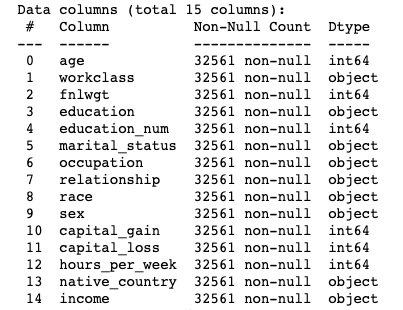


1. age: Represents an individual’s years on earth. <br>
2. workclass: Represents an individual’s employment status
3. fnlwgt: Represents the final weight.  This is the number of people the census believes the entry represents.
4. education: Represents an individual’s highest level of education achieved in object form.
5. education-num: Represents an individual’s highest level of education achieved in numerical form.
6. marital-status: Represents an individual’s civil status in relation to a significant other.
7. occupation: Represents an individual’s general occupation
8. relationship: Represents an individual’s relation to others in a family unit.  The options aren’t consistent and seem to overlap with marital-status column.
9. race: Represents an individual’s shared physical or general region of origin
10. sex: Represents an individual’s gender.  This dataset only had two options for gender.
11. capital-gain: Represents an individual’s profit from the sale of property or an investment
12. capital-loss: Represents an individual’s loss from the sale of property or an investment
13. hours-per-week: Represents an individual’s hours worked per week.
14. native-country: Represents an individual’s country of origin
15. Income: The amount of money an individual generates within a year.

_Source: Kaggle_


## 3. Importing Libraries

In [1]:
#dataframe
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from imblearn. over_sampling import SMOTE


#Classification Algorithms
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

## 4. Importing Dataset 

In [2]:
df = pd.read_csv('/Users/bs/Mac Drive/MSBA/INFO570_50FA20/Term Project/info570datafile.csv')

In [3]:
#checking the imported datafile
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 5. Exploratory Data Analysis

In [4]:
#Determining dimensionality of dataframe
df.shape

(32561, 15)

As we can see, there are 32561 rows (records) and 15 columns in our dataset.

In [5]:
#Listing Dataframe columns
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

Above are the list of column names in our dataset.

In [6]:
#Removing spaces infront of the column names
stripped_columns = []
for item in list(df.columns):
    item = item.strip()
    stripped_columns.append(item)
#Replacing column names with stripped_columns
df.columns = stripped_columns
#Checking new column names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

All our initial column names included " " (space) before their names. Therefore, to make it easier to call columns, we removed the spaces before the column names.

In [7]:
#Using '_' to replace the column names
columns= list(df.columns)
adder = ""
new_columns =[]
for each_column in columns:
    for letter in each_column:
        if letter=="-":
            adder = adder + "_"
        else:
            adder = adder + letter
    new_columns.append(adder)
    adder=""
new_columns


['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

Our column names also include '-' which is not recognised by pandas and gives error while calling it. Therefore, we will replaced '-' with '_' as shown above.

In [8]:
#replacing old columns with new column names
df.columns=new_columns

In [9]:
#Determining dataframe columns characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
#Listing datatypes of the columns
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [11]:
#Descriptive Analytics of quantitative variables in the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


The above table shows descriptive statistics for numerical variables in our dataset.

In [12]:
#calculating mode for categorical variables:
def mode(list_of_nums):
    average = list_of_nums.mode()
    return average

categorical_var = list(df.select_dtypes(include=object).columns)

#printing mode of categorical variables
for item in categorical_var:
    print(item + " mode: "+ mode(df[item]))
    

0    workclass mode:  Private
dtype: object
0    education mode:  HS-grad
dtype: object
0    marital_status mode:  Married-civ-spouse
dtype: object
0    occupation mode:  Prof-specialty
dtype: object
0    relationship mode:  Husband
dtype: object
0    race mode:  White
dtype: object
0    sex mode:  Male
dtype: object
0    native_country mode:  United-States
dtype: object
0    income mode:  <=50K
dtype: object


Above result shows the mode of each categorical columns in the dataset.

In [13]:
#Checking if any cells has missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Above code checks whether there are any empty/blank cells in the dataset. As we can see, there are no empty cell in any column in our dataset.

In [14]:
#Determining different attributes for categorical variables
categorical_var = list(df.select_dtypes(include=object).columns)
for item in categorical_var:
    print(item + ":")
    print(df[item].unique())

workclass:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital_status:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship:
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race:
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex:
[' Male' ' Female']
native_country:
[' United-States' ' Cuba' ' Jamaica' ' 

This shows different categories for each column. We can see that occupation column, workclass and native_country column consists of ?, which is a missing/unknown value. So, we will replace them with another separate attribute known as Unknown.

In [15]:
#replacing '?' with Unknown:
df['workclass'].replace(' ?', ' Unknown',inplace=True)
df['occupation'].replace(' ?', ' Unknown',inplace=True)
df['native_country'].replace(' ?', ' Unknown',inplace=True)

## 6. Data Visualization

### a. Categorical Variables

In [16]:
#list of numberical and categorical variables
categorical_var = list(df.select_dtypes(include=object).columns)
numerical_var = list(df.select_dtypes(exclude=object).columns)

In [17]:
#importing matplotlib and seaborn packages
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, '\nWorkclass Types')

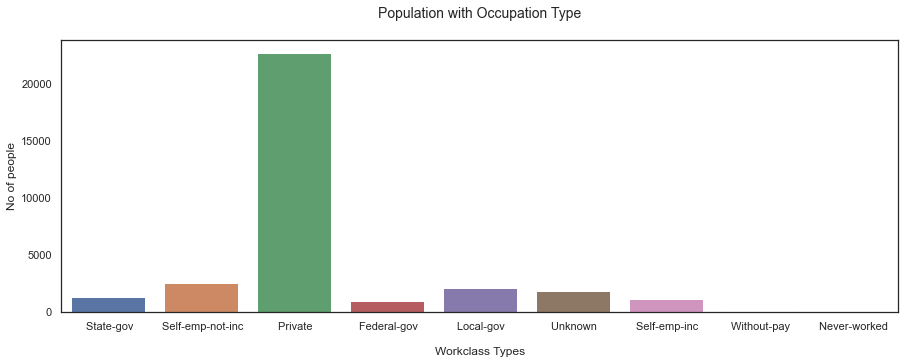

In [18]:
#Creating bargraph for workclass
plt.figure(figsize=(15,5))
sns.set(style = 'white')
sns.countplot(x="workclass", data=df)
plt.title("Population with Occupation Type\n",size =14)
plt.ylabel("No of people")
plt.xlabel("\nWorkclass Types")

The above bargraph shows that most of the people are engaged in private occupaction followed by self-employed, local-gov, and state-gov.

Text(0.5, 0, '\n Education Level')

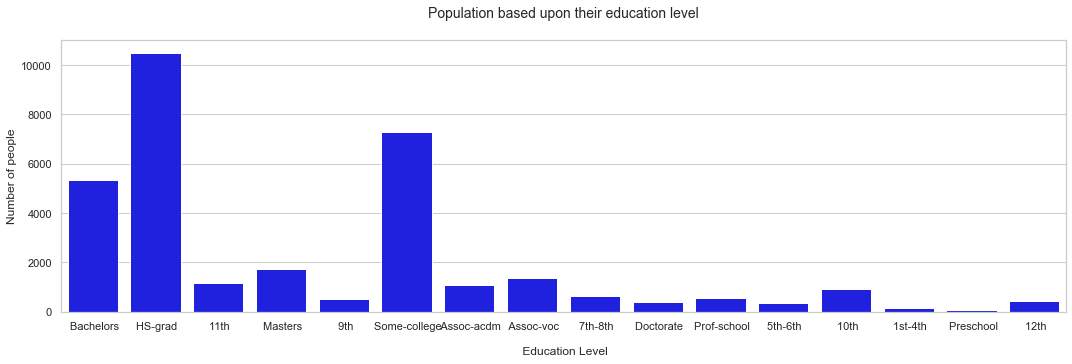

In [19]:
#Bargraph representing number of people with different education level
plt.figure(figsize=(18,5))
sns.set(style = 'whitegrid')
sns.countplot(x="education", data=df,color='blue')
plt.title("Population based upon their education level\n",size=14)
plt.ylabel("Number of people")
plt.xlabel("\n Education Level")

The above bar graph shows that most people in the dataset are highschool graduates followed by some college, and Bachelors degree.

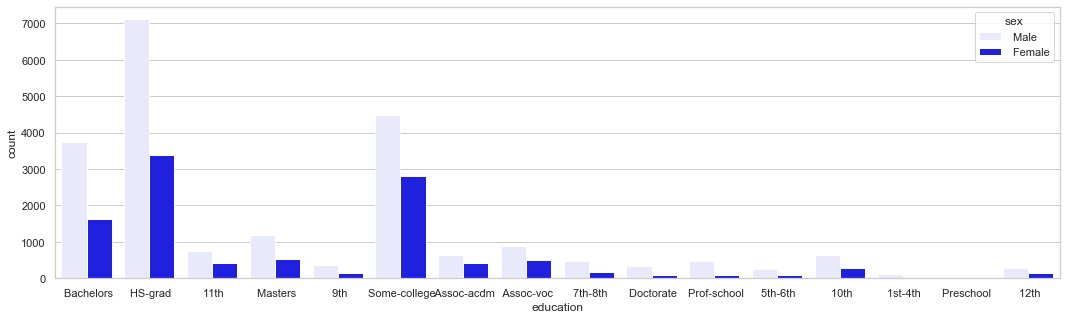

In [20]:
#Graph representing number of people based upon eduacation and sex
plt.figure(figsize=(18,5))
sns.countplot("education",data=df,hue="sex",color="blue")

This graph shows the education level of people along with their sex. We can clearly make a distinction that the dataset contains more male recods than female.

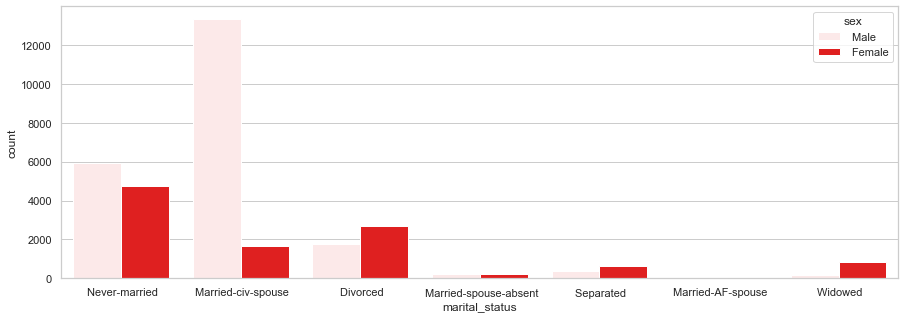

In [21]:
#Graph representing marital_status of people in the dataset:
plt.figure(figsize=(15,5))
sns.countplot("marital_status",data=df,hue="sex",color="red")

Most of the working people are married followed by single people. But in case of female, most of the working females are single followed by divorced and married.

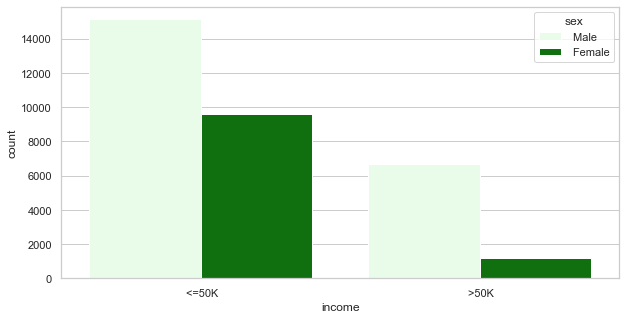

In [22]:
#Graph representing number of people based upon income:
plt.figure(figsize=(10,5))
sns.countplot("income",data=df,hue="sex",color="green")

Majority of people have income less than or equal to $50,000 as shown by the graph above 

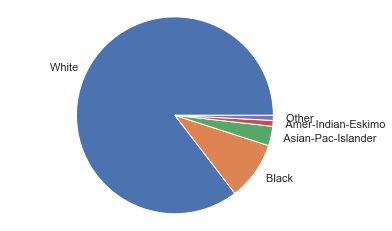

In [50]:
#Piechart showing representation of race in dataset
fig1, ax1 = plt.subplots()
X = list(df['race'].value_counts().index)
Y = list(df['race'].value_counts().values)
ax1.pie(Y,labels=X)
ax1.axis('equal') 
plt.show()

The above piechart shows that most of the records in our dataset belong to white population followed by black, pacific islanders, American-Indian eskimo, and others.

### b. Quantitative Variables

Text(0.5, 1.0, 'Age Histogram')

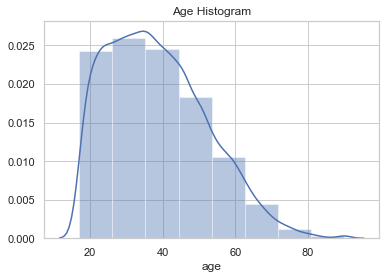

In [31]:
#Histogram representing age
sns.distplot(df['age'],bins=8)
plt.title("Age Histogram")

From above histogram, we can see that most of the people belong to the age group of 20-40 years and age group above 80 has the least number of people.

Text(0.5, 1.0, 'Box plot representing age and income \n')

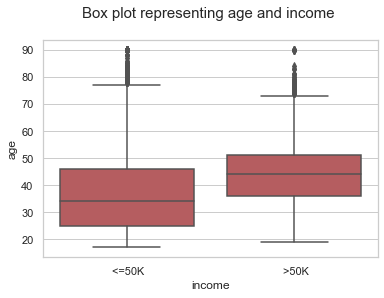

In [32]:
#Variation between age and income level
sns.boxplot(x=df['income'],y=df['age'],color='r')
plt.title("Box plot representing age and income \n", size = 15)

Boxplot can be used to accuratly measure the variation between the variables. As we can see, the median age of people earning less than 50,000 is around 34 years and that of people earling more than 50,000 is around 45 years. 

Text(0.5, 1.0, 'Box plot representing age and income \n')

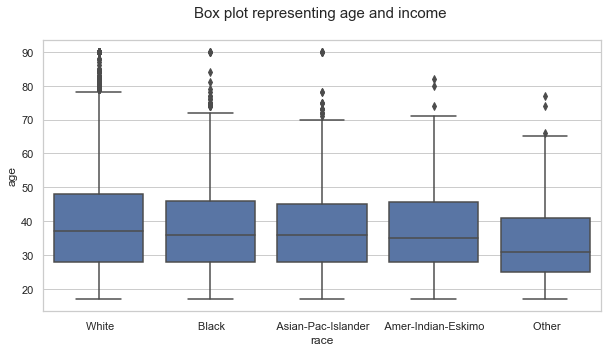

In [33]:
#Variation between race and age
plt.figure(figsize=(10,5))
sns.boxplot(x=df['race'],y=df['age'],color='b')
plt.title("Box plot representing age and income \n", size = 15)

There is not much difference in age of working population among different races. 

Text(0.5, 1.0, 'Box plot representing age and income \n')

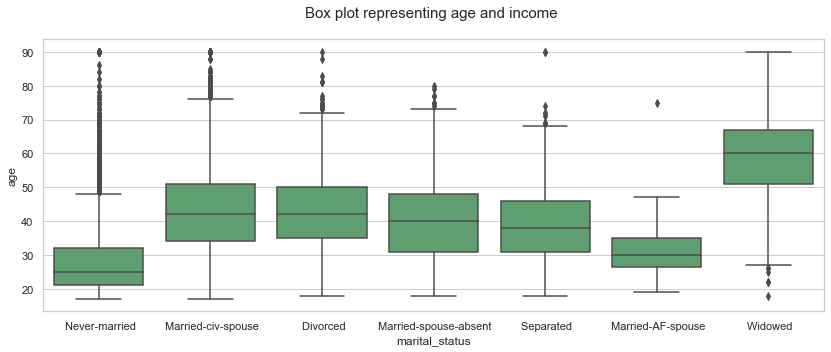

In [34]:
#Variation between marital status and age
plt.figure(figsize=(14,5))
sns.boxplot(x=df['marital_status'],y=df['age'],color='g')
plt.title("Box plot representing age and income \n", size = 15)

Majority of younger people are single. The median age of single people is 25 and that of married and divorced are 42 and 42 respectively. We can also see that most of the widowed female belonged to the age group between 50 to 70 with 60 being the median age.

Text(0.5, 1.0, 'Relationship between hours worked and age')

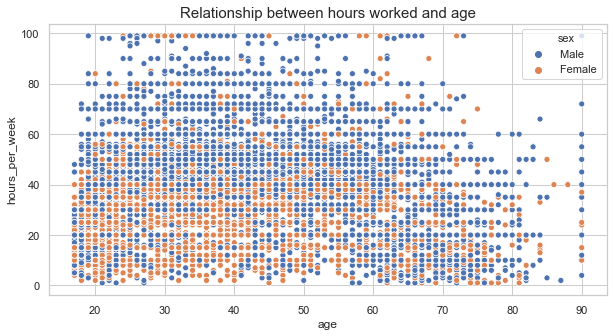

In [35]:
#Scatterplot representing relationship between age and hours-per-week
plt.figure(figsize=(10,5))
sns.scatterplot(x="age",y="hours_per_week",hue="sex",data=df)
plt.title('Relationship between hours worked and age',size=15)

From above scatterplot, we can see that there is no definite relationship between age and hours they work, both in case of male and female. However, we can see that male tends to work more hours per week than that of female.

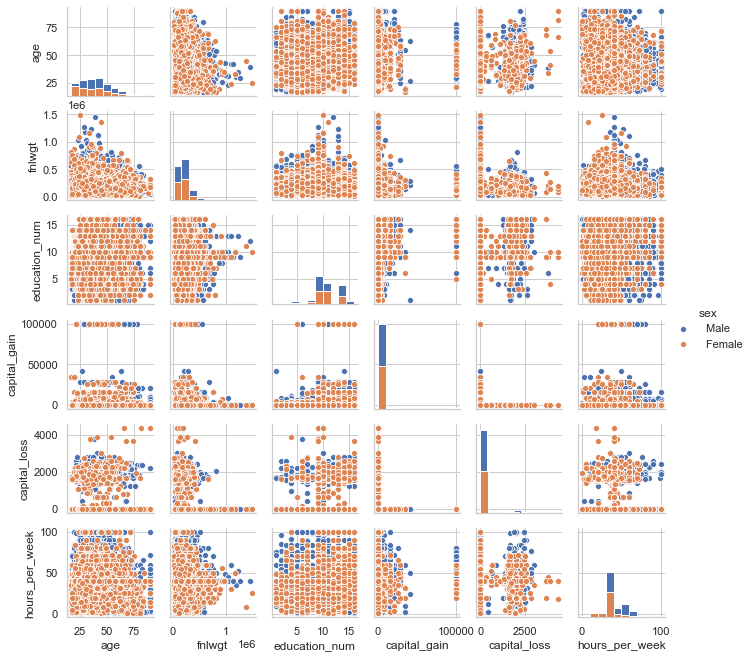

In [36]:
#pairplot to determine relationship between all the quantitative variables
sns.pairplot(df,height =1.5, hue="sex", diag_kind="hist")


The above graph shows the relationship between the quantitative variables. From above scatterplots, we can see that there is not definite correlatio between the numrical variables.

## 7. Data Preprocessing

Data Preprocessing is an important step in predictive analytics. It helps us to eliminate outliers, manage missing values, and handle categorical variables. Our data preprocessing steps includes:
- Dropping Variables
- Data Scaling(Normalization/ Standardization)
- Missing Value Imputation
- Encoding Catergorical variables
- Balancing dataset

### a. Dropping Variables

In [51]:
#Dropping Numerical Variables with Zero Variance
df.std()

age                   13.640433
fnlwgt            105549.977697
education_num          2.572720
capital_gain        7385.292085
capital_loss         402.960219
hours_per_week        12.347429
dtype: float64

In [52]:
#Dropping Categorical Variables with zero variation
categorical_var = list(df.select_dtypes(include=object).columns)
zero_cardinality = []
for column in categorical_var:
    if len(df[column].value_counts().index)==1:
        zero_cardinality.append(column)
zero_cardinality

[]

In [53]:
#Dropping Categorical Variables with Multiple Levels:
high_cardinality = []
for column in categorical_var:
    if len(df[column].value_counts().index)>100:
        high_cardinality.append(column)
high_cardinality

[]

Since we do not have any numerical variable with zero standard deviation and categorical variable with zero or high cardinality, we do not need to drop any variables. However, both marital_status and relationship represent similar information. So, we will drop the relationship column.

In [54]:
#Dropping relationship column
df=df.drop('relationship',axis=1)

In [55]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


### b. Standardizing Numerical Variables

For the purpose of this project, we will standardize the numerical variables. While there is no any specific way to determine whether to normalize or standardize, we chose standardization as our model uses multiple input variables. We also tested both normalization and standardization, and standardization gave better output for our model.

In [56]:

#Standarizing numerical variables
numerical_var = list(df.select_dtypes(exclude=object).columns)
array = df[numerical_var].values
scaler = StandardScaler().fit(array)
df[numerical_var] = pd.DataFrame(scaler.transform(array))



In [57]:
#checking in our numerical variables are not standarized
df[numerical_var].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


### c. Data Imputation

In [58]:
#Checking if any column in our dataset has missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Since we do not have any missing cells in our dataset, we do not need to imputate missing values. If we had any missing quantitative variables, we would replace missing values with median, and with mode in case of categorical variables. If we had too many missing values (>20%), we would drop the entire column to maintain accuracy of our model. 

### d. Encoding Categorical variables

In [59]:
#Selecting all categorical variables except for dependent variable
categorical_var = list(set(df.dtypes[df.dtypes==object].index) - set(['income']))

#Creating dummy variables adn assigning dummy variabels to their original columns
dummy_cat_df = pd.get_dummies(df[categorical_var],drop_first=True)
df=df.drop(categorical_var,axis=1)
df=pd.concat([df,dummy_cat_df],axis = 1)



In [60]:
#Binarizing (encoding) dependent variable 'income'
dummy_cat_df1 = pd.get_dummies(df['income'],drop_first=True)
df=df.drop('income',axis=1)
df=pd.concat([df,dummy_cat_df1],axis = 1)

Now, the income greater than 50K is encoded by 1, and income less than or equal to 50K is encoded by 0.

In [61]:
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,...,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Unknown,native_country_ Vietnam,native_country_ Yugoslavia,sex_ Male,>50K
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


###  e. Balancing Dataset

In [63]:
df[' >50K'].value_counts()

0    24720
1     7841
Name:  >50K, dtype: int64

As we can see, the value count of income less than or equal to 50K (encoded by 0) is 24720 whereas income above 50K (encoded by 1) is 7841. However, before runny any classification algorithm, we need to balance the dataset.  

In [64]:
#balancing dependent variable
from imblearn. over_sampling import SMOTE
os= SMOTE(random_state=0)
input_var = list(set(df.columns)-set([' >50K']))



X,Y = os.fit_sample(df[input_var],df[' >50K'])


X=pd.DataFrame(X,columns=input_var)
Y = pd.DataFrame(Y,columns = [' >50K'])



df = pd.concat([X,Y],axis = 1)

In [65]:
df[' >50K'].value_counts()

1    24720
0    24720
Name:  >50K, dtype: int64

Now, our output variable is balanced as shown above. <br> <br> For our simpliticy to call the dependent column, we will rename dependent variable ' >50K' to 'income'. 

In [66]:
#renaming dependent variable to income
df.rename(columns={' >50K':'income'},inplace=True)

## 8. Predictive analytics

Predictive analytics can be divided into three parts:<br>
a) Supervised Learning<br>
b) Unsupervised Learning<br>
c) Reinforcement Learning

Our project falls under supervised learning category as have a target variable (income) generated by feeding other input variables. Specifically, it falls under classification as we are predicting binary outcomes (i.e. whether income is above 50K or not). The classification algorithms used to test our model are:
- Logistic Regression
- Decision Trees
- Random Forest
- K-NN
- Vector Machine
- Neural Network


### a. Fitting Model

In [67]:

input_var  = set(df.columns) - set(['income'])
X = df[input_var]
Y = df['income']

models = ['LogisticReg', 'DecisionTree', 'RandomForest', 'KNN','Support Vector Machine','Neural Networks']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [68]:
# Logistic Regression
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr') # creates a lR instance
lr.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [69]:
# Decision Trees
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=15)

In [70]:
# Random Forests
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [71]:
# K-NN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [72]:
#Support Vector Machines
SVM = svm.LinearSVC()
SVM.fit(X_train, Y_train)

LinearSVC()

In [73]:
#Neural Networks
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X_train, Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

### b. Model Assessment and Making Predictions

In [74]:
# computes the confusion matrix and performence indicators
def get_performances(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y.round())
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [78]:

pred_Y_lr = lr.predict(X_test) # predicts the Y given the fitted model lr

pred_Y_dt = dt.predict(X_test) # predicts the Y given the fitted model dt

pred_Y_rf = rf.predict(X_test) # predicts the Y given the fitted model rf

pred_Y_knn = knn.predict(X_test) # predicts the Y given the fitted model knn

pred_Y_svm = SVM.predict(X_test) # predicts the Y given the fitted model Support Vector Machines

pred_Y_nn = NN.predict(X_test) # predicts the Y given the fitted model Neural Networks

In [79]:

# accuracy, sensitivity, and specificity for model lr
accuracy_lr, sensitivity_lr, specificity_lr = get_performances(Y_test, pred_Y_lr)


# accuracy, sensitivity, and specificity for model dt
accuracy_dt, sensitivity_dt, specificity_dt = get_performances(Y_test, pred_Y_dt)


# accuracy, sensitivity, and specificity for model rf
accuracy_rf, sensitivity_rf, specificity_rf = get_performances(Y_test, pred_Y_rf)

# accuracy, sensitivity, and specificity for model knn
accuracy_knn, sensitivity_knn, specificity_knn = get_performances(Y_test, pred_Y_knn)

# accuracy, sensitivity, and specificity for model Support Vector Machines
accuracy_svm, sensitivity_svm, specificity_svm = get_performances(Y_test, pred_Y_svm)

# accuracy, sensitivity, and specificity for model Neural Networks
accuracy_nn, sensitivity_nn, specificity_nn = get_performances(Y_test, pred_Y_nn)


In [80]:
# Builds a dataframe using the performance indicators so that we can compare the models easily

perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn,accuracy_svm,accuracy_nn], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression',
                             'Decision Trees', 'Random Forest','K-NN','Support Vector Machine','Neural Networks'])

perf['sensitivity'] = np.asarray([sensitivity_lr,
                                  sensitivity_dt, 
                                  sensitivity_rf,
                                  sensitivity_knn,sensitivity_svm,sensitivity_nn])

perf['specificity'] = np.asarray([specificity_lr,
                                  specificity_dt,
                                  specificity_rf,
                                  specificity_knn,specificity_svm,specificity_nn])
perf

,accuracy,sensitivity,specificity
Logistic Regression,0.838870,0.808851,0.868720
Decision Trees,0.843712,0.792502,0.894634
Random Forest,0.821035,0.747019,0.894634
K-NN,0.847205,0.764966,0.928982
Support Vector Machine,0.838134,0.802704,0.873365
Neural Networks,0.849595,0.815734,0.883266


As we can see, Neural Networks has high accuracy and sensitivity, and K-NN has high specificity. Depending upon the purpose of study, we can chose either Neural Networks or K-NN. Since, we are trying to predict income based upon accuracy, we will chose Neural Network for the purpose of our project.

### c. ROC curve

In [81]:
from sklearn.metrics import roc_curve, auc

In [82]:
score_Y_nn = NN.predict_proba(X_test)
score_Y_nn 

array([[0.99816674, 0.00183326],
       [0.98698978, 0.01301022],
       [0.39217603, 0.60782397],
       ...,
       [0.99825839, 0.00174161],
       [0.12672716, 0.87327284],
       [0.01870608, 0.98129392]])

In [83]:
score_Y_nn = NN.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_nn[:,1])
roc_auc = auc(fpr, tpr)

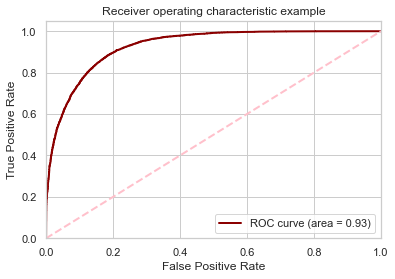

In [84]:
score_Y_nn = NN.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_nn[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkred',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='pink', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Roc curve shows performance of the classification model. It plots false positive rate (X-axis) and true positive rate (Y-axis). The area under the ROC curve is 0.93 which represents that our model is very useful and it able to provide output 93% of the times.

### d. Feature Importance using Random Forest 

In [85]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [86]:

ft_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

ft_scores

age                                           1.734453e-01
marital_status_ Married-civ-spouse            1.362390e-01
fnlwgt                                        1.260196e-01
hours_per_week                                1.044934e-01
education_num                                 6.876780e-02
                                                  ...     
native_country_ Outlying-US(Guam-USVI-etc)    2.286735e-05
occupation_ Armed-Forces                      1.492319e-05
native_country_ Honduras                      1.075042e-05
native_country_ Holand-Netherlands            3.817947e-06
workclass_ Never-worked                       5.582499e-07
Length: 95, dtype: float64

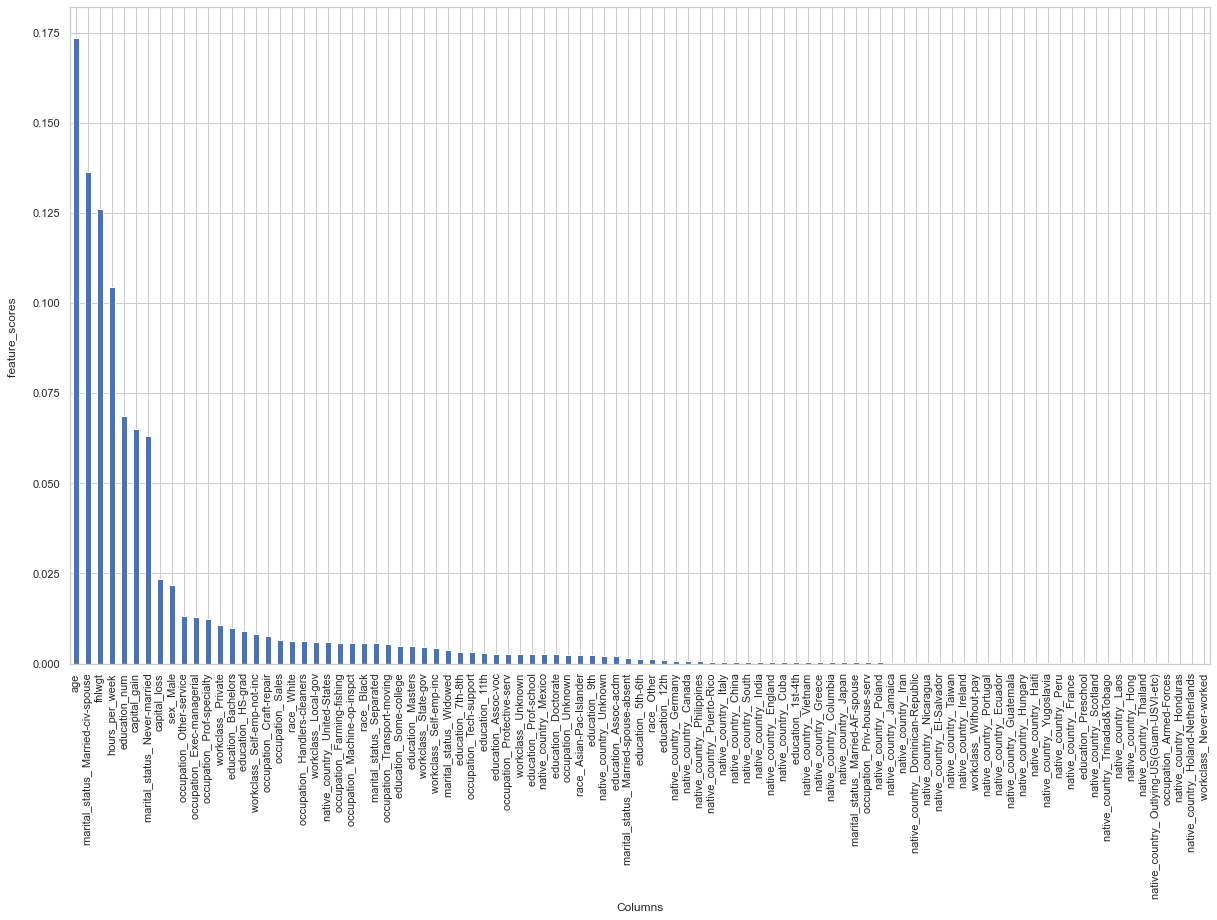

In [87]:
#plotting ft_scores to visualize significance of individual column
plt.figure(figsize = (17,10))
plt.xlabel('Columns')
plt.ylabel('feature_scores \n')
plt.tight_layout()

ft_scores.plot.bar()



We can see that age, fnlwgt has major significance in our model. Whereas, workclass_never-worked, native_country_ Holand-Netherlands has very less significance. Therefore, we can also drop those columns and re-run our prediction model to improve accuracy.

## 9. Implications of the project for future studies


Dataset gathers income information about people living in America in 1994.  The data tracks age, education, marital status, hours worked and shares how much money an individual brings home based on those characteristics.  The implications of this project may help society to determine what a person living in America needs to do to acquire a better income, while also bringing to light possible discrimination.  It shows how working more hours has a better chance of improving your earning potential.  It also shows a correlation between being married and income.  Generally, it seems married couples on average have a better chance of making more than 50,000 than a single person. The project also shows the racial inequality in the 1994’s.  Whites had a greater percentage of people with incomes greater than 50,000.  Another socioeconomic issue brought forth is how men were three times more likely to have incomes greater than 50,000 as compared to women.  

This model can be used to analyze data of any year. We can update the datasource and use the same code to derive our socioeconomic conclusions. By adding more recent observations of individuals to the dataset, we can also build a predictive model which takes present salary data into consideration.


## 10. Why this model is better?

There were various model prepared by other people in Kaggle. However, we think our model is best compared to theirs becuase of the following reasons:
- Our model has higher sensitivity, and specificity compared to other published models. 
- Our model accuracy is comparable to other published models.
- Some of other models did not pre-process the data correctly as they deemed 'fnlwgt' to be not important and dropped column in the initial step. However, through feature_score analysis using random forest above, we know that 'fnlwgt' is infact the second most important column in building the predictive model.
- Our model has higher ROC curve value (0.93) compared to other models. Therefore, our model has higher usage.
- Our model also has various applications as mentioned above. Therefore, it can be used for multiple purposes by changing the dataset and making minor changes in codes.